# Data Forecasting with prophet


# PROPHET PREDICTION

## TESTO

## Import Dependencies

In [307]:
!pip3 install chart_studio
!pip3 install pystan
!pip3 install fbprophet
!pip3 install glob2
!pip3 install python-dateutil

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [308]:
import os
import pandas as pd
from pandas.tseries.offsets import DateOffset
import time
import pytz
import datetime 
from datetime import timedelta
import matplotlib.pyplot as plt
from fbprophet import Prophet
from influxdb_client import InfluxDBClient
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [302]:
import sys
sys.path.insert(0, os.path.abspath('../'))

In [303]:
INFLUXDB_HOST = os.getenv("INFLUX_HOST")
INFLUXDB_PORT = os.getenv("INFLUX_HOST_PORT")
INFLUXDB_ORG = os.getenv("INFLUX_ORG")
INFLUXDB_TOKEN = os.getenv("INFLUX_TOKEN")
client = InfluxDBClient(url="http://"+INFLUXDB_HOST+":"+INFLUXDB_PORT, token=INFLUXDB_TOKEN, org=INFLUXDB_ORG)


[<FluxTable: 12 columns, 21587 records>]


In [304]:
def result_to_dataframe(result):
    raw = []
    for table in result:
        for record in table.records:
            raw.append((record.get_time(), record.get_value()))
    return pd.DataFrame(raw, columns=['ds','y'], index=None)

In [319]:
buckets = [ 'temperature', 'humidity', 'gas']

temperature


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[<FluxTable: 12 columns, 2462 records>]
                                   ds     y
0    2022-10-04 08:22:57.012497+00:00  21.4
1    2022-10-04 08:22:57.870528+00:00  21.4
2    2022-10-04 08:23:00.335595+00:00  21.4
3    2022-10-04 08:23:02.888102+00:00  21.4
4    2022-10-04 08:23:05.344521+00:00  21.4
...                               ...   ...
2457 2022-10-04 11:34:30.362366+00:00  22.0
2458 2022-10-04 11:34:32.966449+00:00  22.0
2459 2022-10-04 11:34:35.360033+00:00  22.0
2460 2022-10-04 11:34:37.860410+00:00  22.0
2461 2022-10-04 11:34:40.358572+00:00  22.0

[2462 rows x 2 columns]
                             ds          y
1969 2022-10-04 10:30:12.813462  21.700001
1970 2022-10-04 10:30:15.320815  21.700001
1971 2022-10-04 10:30:17.811716  21.700001
1972 2022-10-04 10:30:20.320065  21.700001
1973 2022-10-04 10:30:22.813152  21.700001
69
Initial log joint probability = -3.44232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99     

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[<FluxTable: 12 columns, 2462 records>]
                                   ds          y
0    2022-10-04 08:22:57.013767+00:00  61.700001
1    2022-10-04 08:22:57.871636+00:00  61.599998
2    2022-10-04 08:23:00.338598+00:00  61.599998
3    2022-10-04 08:23:02.889557+00:00  61.599998
4    2022-10-04 08:23:05.344963+00:00  61.599998
...                               ...        ...
2457 2022-10-04 11:34:30.363042+00:00  62.000000
2458 2022-10-04 11:34:32.966756+00:00  62.000000
2459 2022-10-04 11:34:35.360378+00:00  62.000000
2460 2022-10-04 11:34:37.860816+00:00  62.000000
2461 2022-10-04 11:34:40.358919+00:00  62.000000

[2462 rows x 2 columns]
Initial log joint probability = -4.14532
                             ds          y
1969 2022-10-04 10:30:12.813691  61.599998
1970 2022-10-04 10:30:15.324529  61.599998
1971 2022-10-04 10:30:17.812154  61.700001
1972 2022-10-04 10:30:20.322083  61.599998
1973 2022-10-04 10:30:22.814914  61.599998
69
    Iter      log prob        ||dx||      ||g

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[<FluxTable: 12 columns, 2462 records>]
                                   ds    y
0    2022-10-04 08:22:57.013838+00:00  101
1    2022-10-04 08:22:57.873830+00:00  108
2    2022-10-04 08:23:00.339091+00:00  108
3    2022-10-04 08:23:02.889689+00:00  109
4    2022-10-04 08:23:05.345011+00:00   78
...                               ...  ...
2457 2022-10-04 11:34:30.364383+00:00  107
2458 2022-10-04 11:34:32.966805+00:00  102
2459 2022-10-04 11:34:35.360441+00:00  105
2460 2022-10-04 11:34:37.860894+00:00   99
2461 2022-10-04 11:34:40.358989+00:00   98

[2462 rows x 2 columns]
Initial log joint probability = -221.256
                             ds    y
1969 2022-10-04 10:30:12.813715  132
1970 2022-10-04 10:30:15.324552  134
1971 2022-10-04 10:30:17.812203  132
1972 2022-10-04 10:30:20.322161  118
1973 2022-10-04 10:30:22.814960  130
69
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       2742.16    0.00244808       616.972   5.824e-0

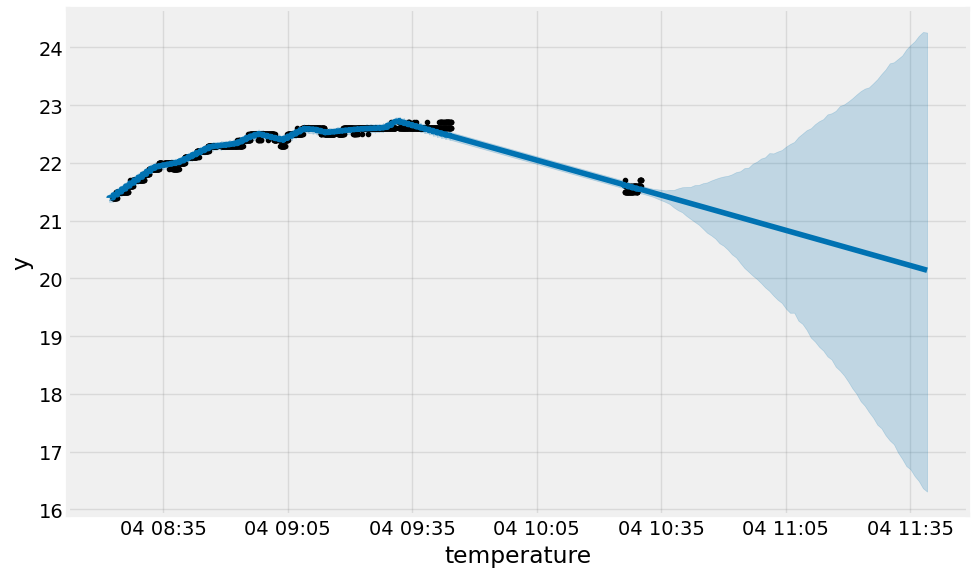

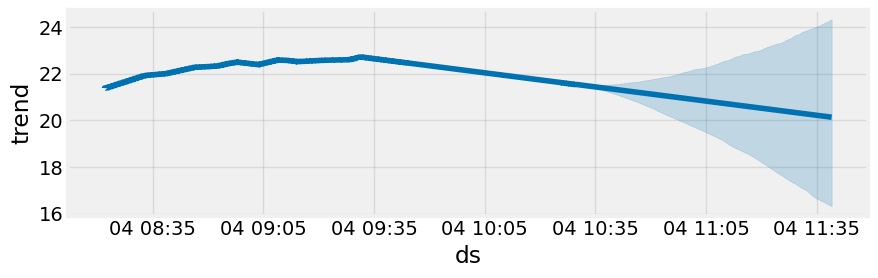

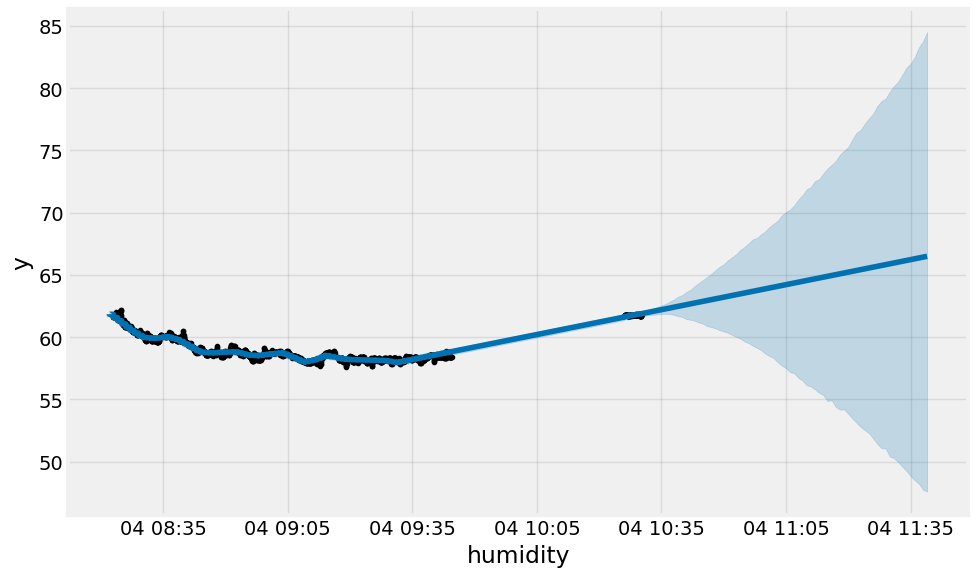

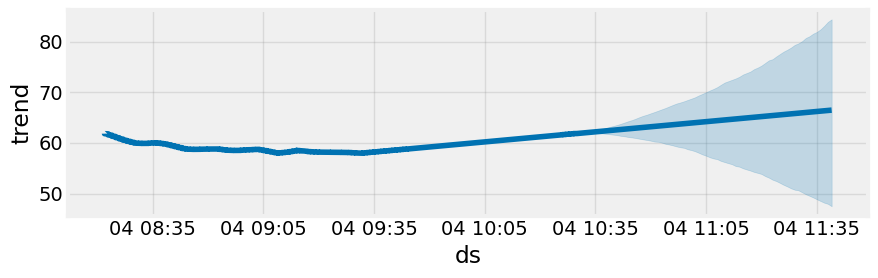

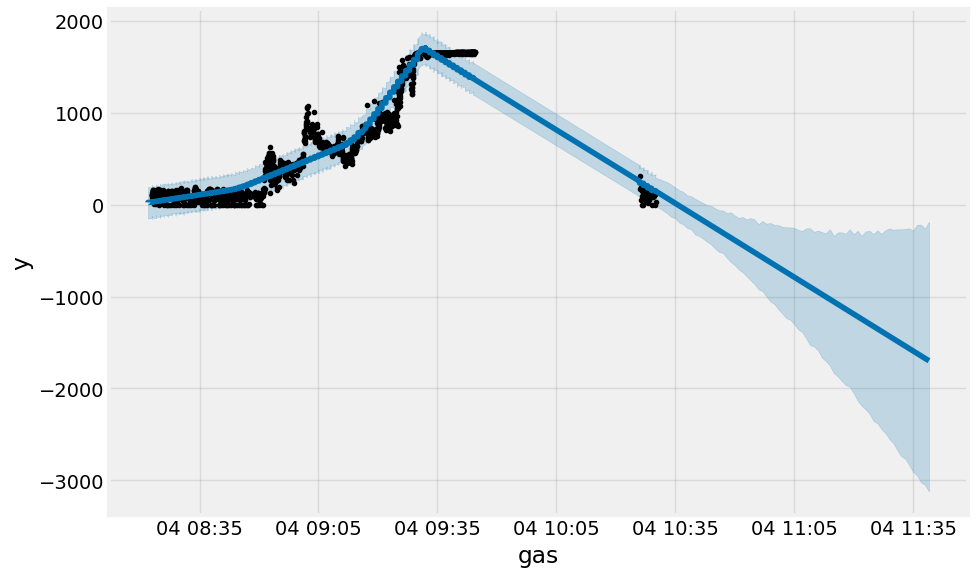

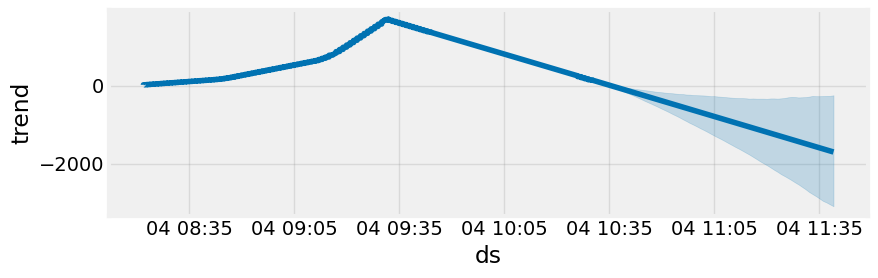

In [325]:
mse_array = []
forecasted_array = []
for bucket in buckets:
    print(bucket)
    query = 'from(bucket: "'+ bucket +'")' \
                ' |> range(start:-1d)'\
                ' |> filter(fn: (r) => r["_measurement"] == "val")' \
                ' |> filter(fn: (r) => r["_field"] == "' + bucket +'")' \

    result = client.query_api().query(org=INFLUXDB_ORG, query=query)

    print(result)
    # Convert the results to dataframe
    df = result_to_dataframe(result)
    print(df)
    df['ds'] = df['ds'].dt.tz_localize(None)
    train, test = train_test_split(df, test_size=0.2, shuffle=False)
    m = Prophet(changepoint_prior_scale=0.01).fit(train)
    print(test.head())

    test_interval = int((test.iloc[-1]['ds'].timestamp() - test.iloc[0]['ds'].timestamp()) / 60)
    test_interval = test_interval + 5
    print(test_interval)

    future = m.make_future_dataframe(periods=test_interval, freq= DateOffset(minutes=1))
    forecast = m.predict(future)
    forecast['ds'] = forecast.ds.dt.floor('min')
    test['ds'] = test.ds.dt.floor('min')
    metric = test.set_index('ds')[['y']].join(forecast.set_index('ds').yhat).reset_index()
    mse = mean_squared_error(metric['y'], metric['yhat'])
    print(mse)
    mse_array.append(bucket+": "+str(mse)) #trovare il modo di salvare tutti i dati
    forecasted_array.append(bucket+": "+str(metric))
    m.plot(forecast, uncertainty=True, xlabel = bucket)
    m.plot_components(forecast)
    

print(mse_array)
print(metric)
    


/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



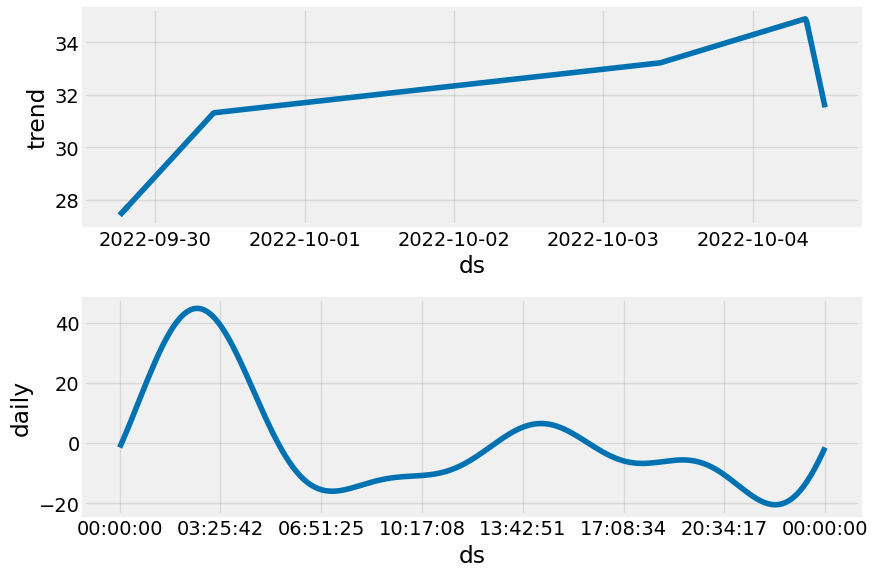

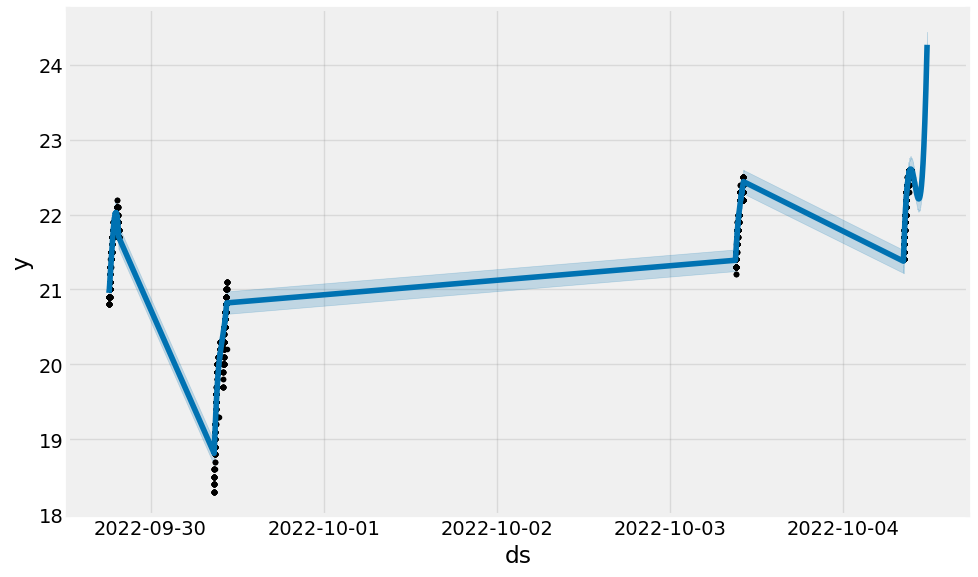

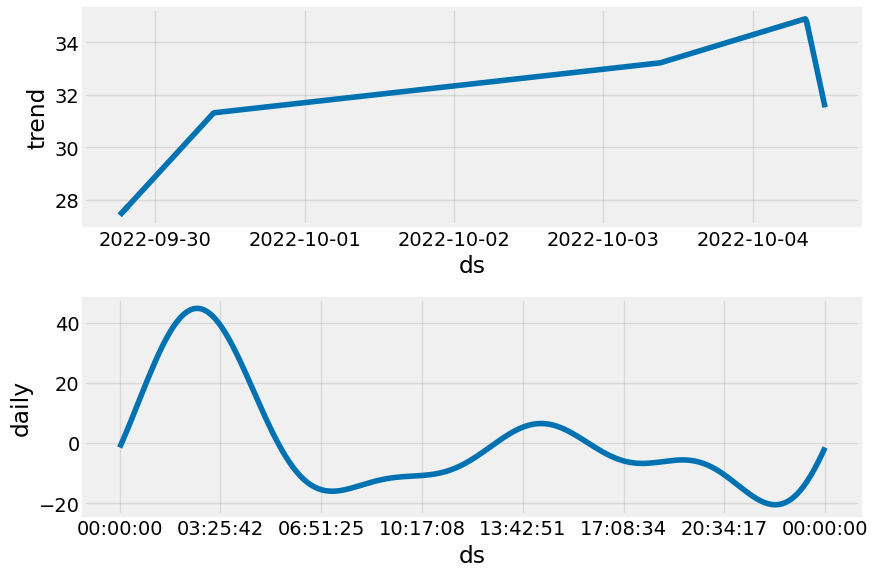

In [317]:
m.plot(forecast, uncertainty=True)

m.plot_components(forecast)
